In [ ]:
!pip install wfdb
import wfdb
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy.fft import rfft, rfftfreq
from sklearn.utils import resample

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 55.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.


In [31]:
#classifiers
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [ ]:
cwd = os.getcwd()
print("Current Working Directory:", cwd)

Current Working Directory: /content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Course_work')
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content/drive/MyDrive/Course_work


In [ ]:
data_dir = './mit-bih-arrhythmia-database-1.0.0'

In [ ]:
open(os.path.join(data_dir, 'RECORDS'))

<_io.TextIOWrapper name='./mit-bih-arrhythmia-database-1.0.0/RECORDS' mode='r' encoding='utf-8'>

In [ ]:
with open(os.path.join(data_dir, 'RECORDS'), 'r') as f:
    records = [line.strip() for line in f]

In [ ]:
label_decode = {
    'N': 0,
    'L': 1,
    'R': 2,
    'A': 3,
    'V': 4,
    '/': 5
}

In [ ]:
all_beats = []
for rec in records:
    record = wfdb.rdrecord(os.path.join(data_dir, rec))
    annotation = wfdb.rdann(os.path.join(data_dir, rec), 'atr')
    fs = record.fs
    signal = record.p_signal[:, 0]
    r_peaks = annotation.sample
    labels = annotation.symbol
    window_before = int(0.2 * fs)
    window_after = int(0.4 * fs)



    beats, beat_labels = [], []
    for i, r in enumerate(r_peaks):
        if r > window_before and r + window_after < len(signal):
            segment = signal[r - window_before : r + window_after]
            beats.append(segment)
            beat_labels.append(labels[i])

    df = pd.DataFrame(beats)
    df['label'] = beat_labels
    df['target'] = df['label'].map(label_decode)
    df['record'] = rec
    all_beats.append(df)

final_df = pd.concat(all_beats, ignore_index=True)
final_df.to_csv('mitbih_beat_dataset.csv', index=False)


In [ ]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,209,210,211,212,213,214,215,label,target,record
0,-0.145,-0.145,-0.145,-0.120,-0.135,-0.145,-0.150,-0.160,-0.155,-0.160,...,-0.245,-0.255,-0.250,-0.250,-0.265,-0.260,-0.260,N,0.0,100
1,-0.270,-0.275,-0.275,-0.270,-0.250,-0.250,-0.255,-0.225,-0.220,-0.205,...,-0.300,-0.320,-0.325,-0.310,-0.305,-0.315,-0.305,N,0.0,100
2,-0.315,-0.295,-0.300,-0.295,-0.285,-0.275,-0.265,-0.265,-0.265,-0.255,...,-0.310,-0.295,-0.310,-0.325,-0.330,-0.320,-0.320,N,0.0,100
3,-0.310,-0.305,-0.290,-0.285,-0.275,-0.280,-0.280,-0.275,-0.265,-0.255,...,-0.300,-0.305,-0.300,-0.295,-0.300,-0.305,-0.315,N,0.0,100
4,-0.275,-0.280,-0.275,-0.270,-0.265,-0.250,-0.230,-0.245,-0.240,-0.255,...,-0.280,-0.290,-0.295,-0.305,-0.325,-0.305,-0.300,N,0.0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112569,-0.195,-0.200,-0.210,-0.210,-0.215,-0.190,-0.180,-0.195,-0.195,-0.210,...,-0.225,-0.235,-0.235,-0.235,-0.225,-0.225,-0.240,N,0.0,234
112570,-0.215,-0.215,-0.220,-0.225,-0.225,-0.230,-0.225,-0.225,-0.200,-0.200,...,-0.275,-0.285,-0.280,-0.275,-0.285,-0.275,-0.265,N,0.0,234
112571,-0.260,-0.250,-0.250,-0.245,-0.255,-0.260,-0.270,-0.280,-0.270,-0.245,...,-0.245,-0.240,-0.245,-0.235,-0.245,-0.250,-0.240,N,0.0,234
112572,-0.245,-0.235,-0.240,-0.230,-0.230,-0.245,-0.245,-0.230,-0.205,-0.190,...,-0.195,-0.180,-0.180,-0.175,-0.180,-0.180,-0.170,N,0.0,234


In [ ]:
final_df.label.value_counts()

,count
label,
N,75028
L,8072
R,7255
V,7129
/,7027
A,2546
+,1253
f,982
F,802


In [ ]:
final_df = final_df.dropna(subset=['target'])
final_df['target'] = final_df['target'].astype(int)

/tmp/ipython-input-1915697626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['target'] = final_df['target'].astype(int)


In [ ]:
final_df.label.value_counts(), final_df.target.value_counts()

(label
 N    75028
 L     8072
 R     7255
 V     7129
 /     7027
 A     2546
 Name: count, dtype: int64,
 target
 0    75028
 1     8072
 2     7255
 4     7129
 5     7027
 3     2546
 Name: count, dtype: int64)

In [ ]:
segments = []
labels = []

for rec in records:
    record = wfdb.rdrecord(os.path.join(data_dir, rec))
    ann = wfdb.rdann(os.path.join(data_dir, rec), 'atr')
    sig = record.p_signal[:, 0]  # lead MLII

    for s, l in zip(ann.sample, ann.symbol):
        if l not in label_decode:
            continue
        if s > window_before and s + window_after < len(sig):
            beat = sig[s - window_before : s + window_after]
            segments.append(beat)
            labels.append(label_decode[l])

segments = np.array(segments)
labels = np.array(labels)
print("Extracted beats:", segments.shape)


Extracted beats: (107057, 216)


In [ ]:
segments

array([[-0.145, -0.145, -0.145, ..., -0.265, -0.26 , -0.26 ],
       [-0.27 , -0.275, -0.275, ..., -0.305, -0.315, -0.305],
       [-0.315, -0.295, -0.3  , ..., -0.33 , -0.32 , -0.32 ],
       ...,
       [-0.26 , -0.25 , -0.25 , ..., -0.245, -0.25 , -0.24 ],
       [-0.245, -0.235, -0.24 , ..., -0.18 , -0.18 , -0.17 ],
       [-0.19 , -0.18 , -0.19 , ..., -0.315, -0.31 , -0.315]])

In [ ]:
import numpy as np

def fft_features_from_segments(seg, fs, n_bins=50):

    n_segments, N = segments.shape

    # 1) Apply FFT (one-sided for real ECG)
    fft_vals = np.fft.rfft(segments, axis=1)

    # 2) Magnitude spectrum
    mag = np.abs(fft_vals)

    # 3) Optionally normalize by N
    mag /= N

    # 4) Keep only first n_bins (low frequencies usually most informative for ECG)
    n_bins = min(n_bins, mag.shape[1])
    feats = mag[:, :n_bins]


    freqs = np.fft.rfftfreq(N, d=1.0/fs)[:n_bins]

    return feats, freqs


In [ ]:
seg_fft = fft_features_from_segments(segments, fs)[0]

In [ ]:
seg_fft.shape

(107057, 50)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    seg_fft, labels, test_size=0.2, random_state=42, stratify=labels
)


In [ ]:

leaf_options = [5, 10, 20, 30, 40, 60, 80, 100, 120, 140]

train_errors = []
val_errors = []

for L in leaf_options:
    dt = DecisionTreeClassifier(
        max_leaf_nodes=L,
        random_state=42
    )
    # CV estimate of validation error (1 - mean accuracy)
    val_scores = cross_val_score(dt, X_train, y_train,
                                 cv=5, scoring='accuracy')
    val_errors.append(1 - val_scores.mean())

    # Fit once on full training set to get training error
    dt.fit(X_train, y_train)
    train_errors.append(1 - dt.score(X_train, y_train))

plt.plot(leaf_options, train_errors, label="Training set")
plt.plot(leaf_options, val_errors, label="Validation set")
plt.xlabel("Number of leaf nodes")
plt.ylabel("Error rate")
plt.title("Error rate vs. number of leaf nodes")
plt.legend()
plt.show()


In [21]:
dt = DecisionTreeClassifier(
    criterion="gini",
    random_state=42,
    max_depth=None,
    max_leaf_nodes=80,
    max_features=None,
    min_samples_leaf=5,
)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     15006
           1       0.93      0.89      0.91      1615
           2       0.91      0.88      0.89      1451
           3       0.89      0.55      0.68       509
           4       0.85      0.77      0.81      1426
           5       0.95      0.96      0.95      1405

    accuracy                           0.94     21412
   macro avg       0.91      0.84      0.87     21412
weighted avg       0.94      0.94      0.94     21412



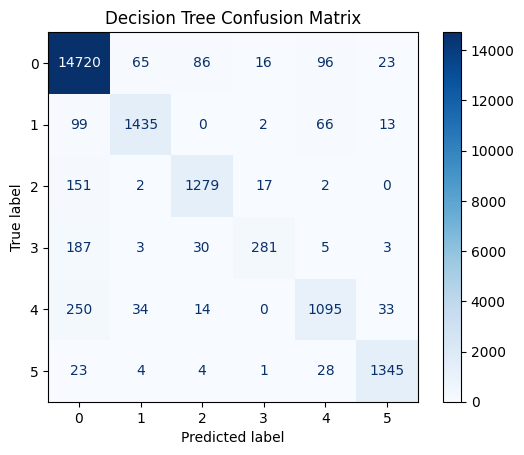

In [22]:

dt_cm = confusion_matrix(y_test, y_pred_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=sorted(np.unique(y_test)))
disp.plot(cmap=plt.cm.Blues)
plt.title('Decision Tree Confusion Matrix')
plt.show()

Kernel=linear, mean CV accuracy=0.897
Kernel=rbf, mean CV accuracy=0.888
Kernel=poly, mean CV accuracy=0.720
Kernel=sigmoid, mean CV accuracy=0.868


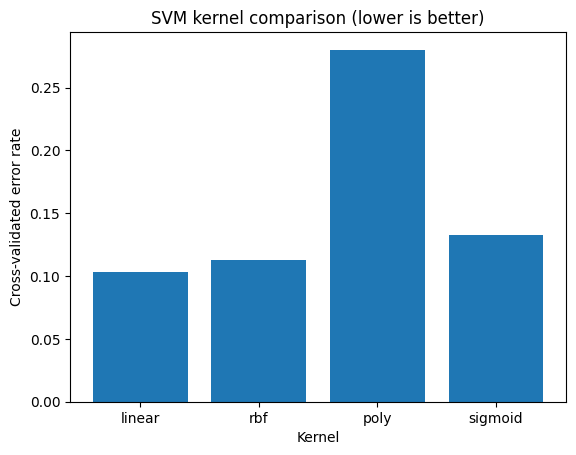

In [ ]:
kernels = ["linear", "rbf", "poly", "sigmoid"]
C = 10
gamma = 1e-1  # ignored for linear

errors = []

for k in kernels:
    svm = SVC(kernel=k, C=C, gamma=gamma)
    # 5-fold CV accuracy on training set
    scores = cross_val_score(svm, X_train, y_train,
                             cv=5, scoring="accuracy")
    mean_error = 1 - scores.mean()
    errors.append(mean_error)
    print(f"Kernel={k}, mean CV accuracy={scores.mean():.3f}")

# Plot error vs kernel
plt.bar(kernels, errors)
plt.ylabel("Cross-validated error rate")
plt.xlabel("Kernel")
plt.title("SVM kernel comparison (lower is better)")
plt.show()

In [29]:
svm_clf = SVC(
    kernel="linear",  # best kernel from CV
    C=10,
    gamma=1e-1,
    random_state=42
)

svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     15006
           1       0.81      0.77      0.79      1615
           2       0.96      0.53      0.68      1451
           3       0.00      0.00      0.00       509
           4       0.93      0.72      0.81      1426
           5       0.99      1.00      0.99      1405

    accuracy                           0.90     21412
   macro avg       0.76      0.67      0.70     21412
weighted avg       0.88      0.90      0.88     21412



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


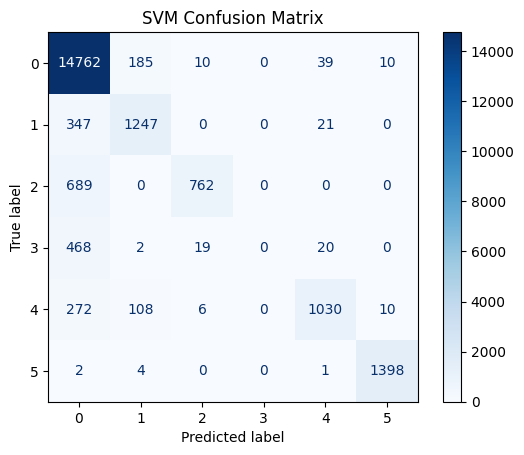

In [42]:
dt_cm = confusion_matrix(y_test, y_pred_svm)
# Use unique labels from y_test for display_labels
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=sorted(np.unique(y_test)))
disp.plot(cmap=plt.cm.Blues)
plt.title('SVM Confusion Matrix')
plt.show()

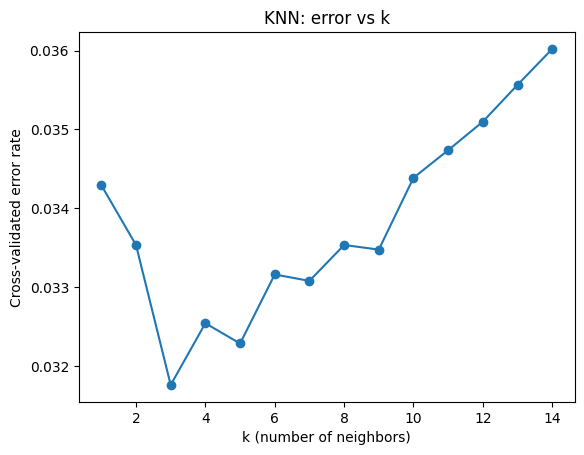

Best k: 3


In [ ]:

k_values = range(1, 15)  # candidate k
cv_errors = []

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

for k in k_values:
    pipe.set_params(knn__n_neighbors=k)
    scores = cross_val_score(
        pipe, X_train, y_train,
        cv=5, scoring="accuracy"
    )
    cv_errors.append(1 - scores.mean())

plt.plot(k_values, cv_errors, marker='o')
plt.xlabel("k (number of neighbors)")
plt.ylabel("Cross‑validated error rate")
plt.title("KNN: error vs k")
plt.show()

best_k = k_values[int(np.argmin(cv_errors))]
print("Best k:", best_k)


In [28]:
# Build final KNN model with k=3
knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=3))
])

# Train on full training set
knn_pipe.fit(X_train, y_train)

# Evaluate on test set
y_pred_knn = knn_pipe.predict(X_test)

print("Test accuracy (KNN, k=3):", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


Test accuracy (KNN, k=3): 0.9694096768167383
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     15006
           1       0.96      0.97      0.96      1615
           2       0.97      0.91      0.94      1451
           3       0.83      0.70      0.76       509
           4       0.97      0.88      0.92      1426
           5       0.95      1.00      0.97      1405

    accuracy                           0.97     21412
   macro avg       0.94      0.91      0.92     21412
weighted avg       0.97      0.97      0.97     21412



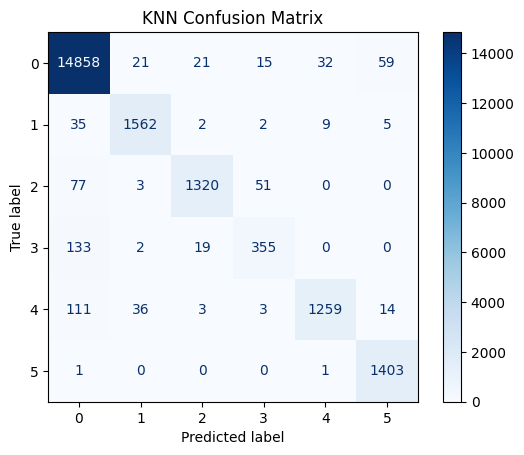

In [41]:
knn_cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=sorted(np.unique(y_test)))
disp.plot(cmap=plt.cm.Blues)
plt.title('KNN Confusion Matrix')
plt.show()

n_estimators=10, mean CV acc=0.971
n_estimators=20, mean CV acc=0.974
n_estimators=50, mean CV acc=0.975
n_estimators=100, mean CV acc=0.975
n_estimators=150, mean CV acc=0.975
n_estimators=200, mean CV acc=0.975
n_estimators=300, mean CV acc=0.975


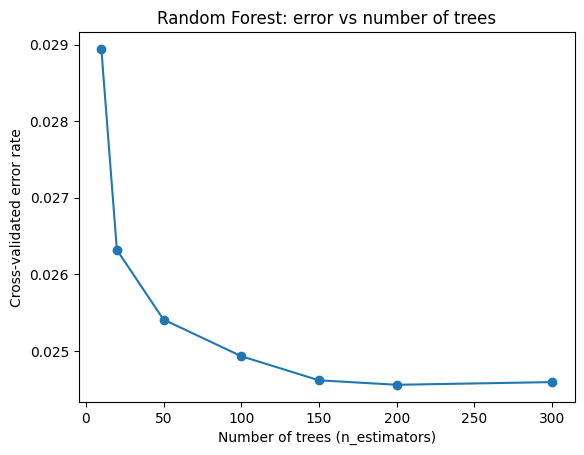

In [ ]:


n_values = [10, 20, 50, 100, 150, 200, 300]
cv_errors = []

for n in n_values:
    rf = RandomForestClassifier(
        n_estimators=n,
        max_depth=None,
        min_samples_leaf=5,   #
        max_features="sqrt",
        random_state=42,
        n_jobs=-1
    )
    scores = cross_val_score(
        rf, X_train, y_train,
        cv=5,
        scoring="accuracy"
    )
    cv_errors.append(1 - scores.mean())
    print(f"n_estimators={n}, mean CV acc={scores.mean():.3f}")

plt.plot(n_values, cv_errors, marker="o")
plt.xlabel("Number of trees (n_estimators)")
plt.ylabel("Cross‑validated error rate")
plt.title("Random Forest: error vs number of trees")
plt.show()


In [26]:
rf = RandomForestClassifier(
    n_estimators=200,   # best number of trees found
    max_features="sqrt",  # best feature subset strategy
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15006
           1       1.00      0.96      0.98      1615
           2       0.99      0.96      0.97      1451
           3       0.95      0.66      0.78       509
           4       0.96      0.92      0.94      1426
           5       1.00      0.99      1.00      1405

    accuracy                           0.98     21412
   macro avg       0.98      0.91      0.94     21412
weighted avg       0.98      0.98      0.98     21412



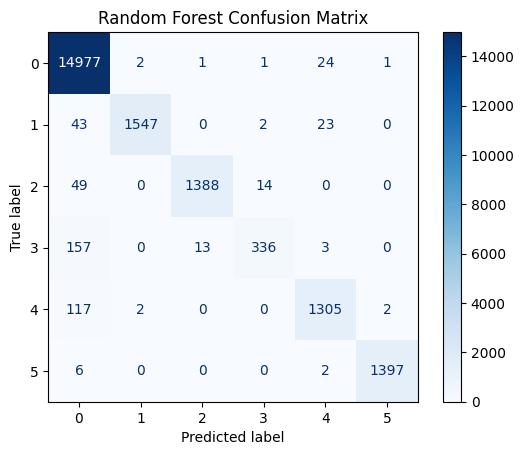

In [27]:
rf_cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=sorted(np.unique(y_test)))
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
base_log_reg = LogisticRegression(
    multi_class="multinomial",  # proper multiclass LR
    solver="lbfgs",             # supports multinomial
    max_iter=1000,
    n_jobs=-1
)

In [ ]:
log_param_grid = {
    "C": [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],          # strength of regularization (inverse)
    "penalty": ["l2"],               # with lbfgs, only l2 is valid
}

In [ ]:
log_reg_grid = GridSearchCV(
    estimator=base_log_reg,
    param_grid=log_param_grid,
    cv=5,
    scoring="f1_macro",   # or 'accuracy', etc.
    n_jobs=-1,
    verbose=1
)

log_reg_grid.fit(X_train, y_train)

print("Best params:", log_reg_grid.best_params_)
print("Best CV macro F1:", log_reg_grid.best_score_)




Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best params: {'C': 100000, 'penalty': 'l2'}
Best CV macro F1: 0.7800525333213559


In [ ]:
results = log_reg_grid.cv_results_

C_vals = results["param_C"].data.astype(float)   # parameter values
cv_scores = results["mean_test_score"]           # mean CV score for each C

order = np.argsort(C_vals)
C_vals = C_vals[order]
cv_scores = cv_scores[order]

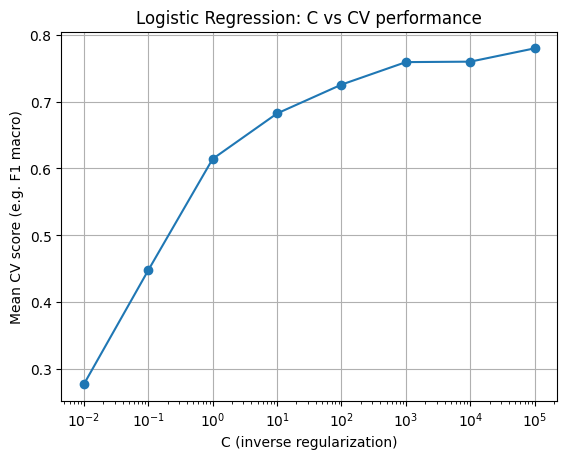

In [ ]:
plt.figure()
plt.plot(C_vals, cv_scores, marker="o")
plt.xscale("log")          # C is usually on a log scale
plt.xlabel("C (inverse regularization)")
plt.ylabel("Mean CV score (e.g. F1 macro)")
plt.title("Logistic Regression: C vs CV performance")
plt.grid(True)
plt.show()

In [34]:
log_reg = LogisticRegression(
    C=1000.0,
    multi_class="multinomial",  # or "ovr"
    solver="lbfgs",
    max_iter=1000,
    n_jobs=-1
)

log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
print(classification_report(y_test, y_pred_lr))

y_score_lr = log_reg.predict_proba(X_test)
auc_lr = roc_auc_score(
    y_test,
    y_score_lr,
    multi_class="ovr",
    average="macro"
)
print("Logistic Regression macro ROC–AUC:", auc_lr)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     15006
           1       0.84      0.78      0.81      1615
           2       0.87      0.69      0.77      1451
           3       0.81      0.25      0.38       509
           4       0.87      0.76      0.81      1426
           5       0.98      0.98      0.98      1405

    accuracy                           0.91     21412
   macro avg       0.88      0.74      0.78     21412
weighted avg       0.91      0.91      0.90     21412

Logistic Regression macro ROC–AUC: 0.9549366657042393


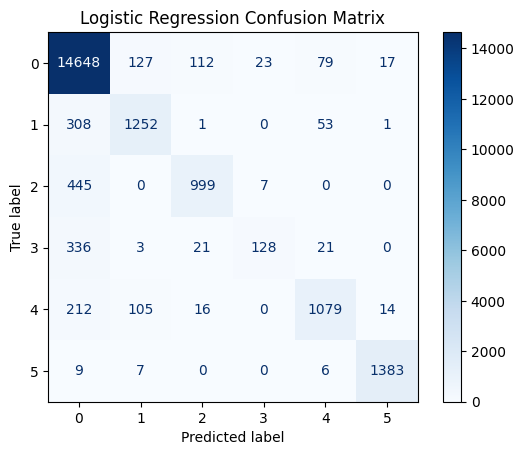

In [36]:
lr_cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=sorted(np.unique(y_test)))
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [32]:
lda = LinearDiscriminantAnalysis()

param_grid = [
    {   # plain SVD (no shrinkage)
        "solver": ["svd"],
        "shrinkage": [None]   # shrinkage ignored for 'svd'
    },
    {   # LSQR + shrinkage
        "solver": ["lsqr"],
        "shrinkage": ["auto"]   # or try numbers: [0.0, 0.1, 0.5]
    },
    {   # EIGEN + shrinkage
        "solver": ["eigen"],
        "shrinkage": ["auto"]
    }
]

grid_lda = GridSearchCV(
    estimator=lda,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_lda.fit(X_train, y_train)

print("Best LDA params:", grid_lda.best_params_)
print("Best CV accuracy:", grid_lda.best_score_)

best_lda = grid_lda.best_estimator_
y_pred_lda = best_lda.predict(X_test)
lda_acc = accuracy_score(y_test, y_pred_lda)


print("Test accuracy (LDA):", lda_acc)
print(classification_report(y_test, y_pred_lda))


Best LDA params: {'shrinkage': None, 'solver': 'svd'}
Best CV accuracy: 0.881429155233814
Test accuracy (LDA): 0.8807677937605082
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     15006
           1       0.77      0.59      0.67      1615
           2       0.90      0.56      0.69      1451
           3       0.68      0.18      0.29       509
           4       0.89      0.68      0.77      1426
           5       0.93      0.98      0.96      1405

    accuracy                           0.88     21412
   macro avg       0.84      0.66      0.72     21412
weighted avg       0.88      0.88      0.87     21412



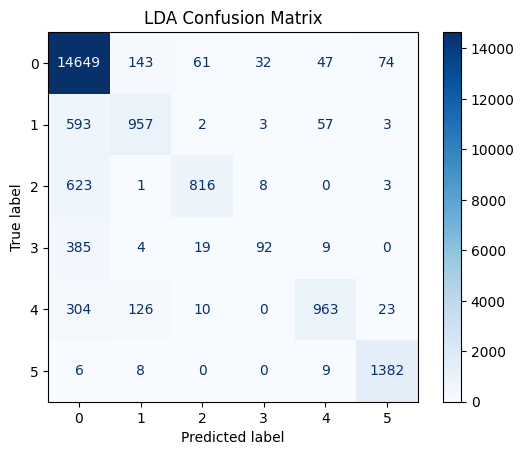

In [35]:
lda_cm = confusion_matrix(y_test, y_pred_lda)
# Use unique labels from y_test for display_labels
disp = ConfusionMatrixDisplay(confusion_matrix=lda_cm, display_labels=sorted(np.unique(y_test)))
disp.plot(cmap=plt.cm.Blues)
plt.title('LDA Confusion Matrix')
plt.show()

In [24]:
#saving the trained models
import joblib


In [38]:



joblib.dump(rf, "best_random_forest.pkl")
joblib.dump(svm_clf, "best_svm.pkl")
joblib.dump(dt, "best_decision_tree.pkl")
joblib.dump(grid_lda, "best_lda.pkl")
joblib.dump(log_reg, "log_reg.pkl")
joblib.dump(knn_pipe, "best_knn.pkl")


['best_knn.pkl']

In [39]:
#loading the saved models

best_rf = joblib.load("best_random_forest.pkl")
best_svm = joblib.load("best_svm.pkl")
best_dt = joblib.load("best_decision_tree.pkl")
best_lda = joblib.load("best_lda.pkl")
best_lg = joblib.load("log_reg.pkl")
best_knn = joblib.load("best_knn.pkl")

In [ ]:
saved_rf = best_rf.predict(X_test)

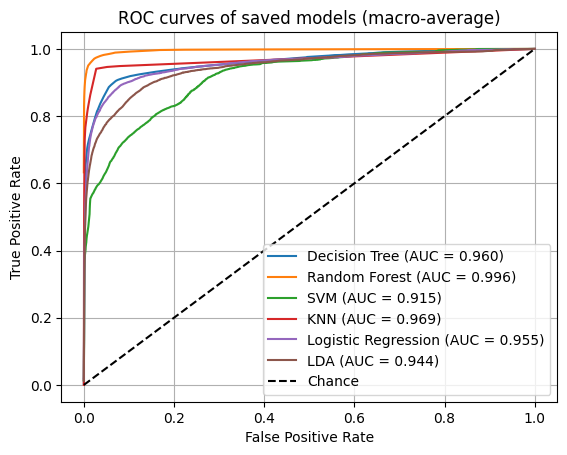

In [40]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

scores = {
    "Decision Tree": best_dt.predict_proba(X_test),
    "Random Forest": best_rf.predict_proba(X_test),
    "SVM": best_svm.decision_function(X_test),
    "KNN": best_knn.predict_proba(X_test),
    "Logistic Regression": best_lg.predict_proba(X_test),
    "LDA": best_lda.predict_proba(X_test),
}

plt.figure()

for name, y_score in scores.items():
    n_classes = y_score.shape[1]

    # per-class ROC
    fpr = []
    tpr = []
    for i in range(n_classes):
        f_i, t_i, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        fpr.append(f_i)
        tpr.append(t_i)

    # macro-average ROC
    all_fpr = np.unique(np.concatenate(fpr))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    roc_auc_macro = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, label=f"{name} (AUC = {roc_auc_macro:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves of saved models (macro‑average)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
